## Contents
* Direct paths to-fro home and rewardport
* Line of sight analysis
* Finding nodes equivalent to nodes based on number of steps remembered (WIP)

###### by Umesh

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [55]:
from collections import defaultdict

In [2]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

In [3]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579


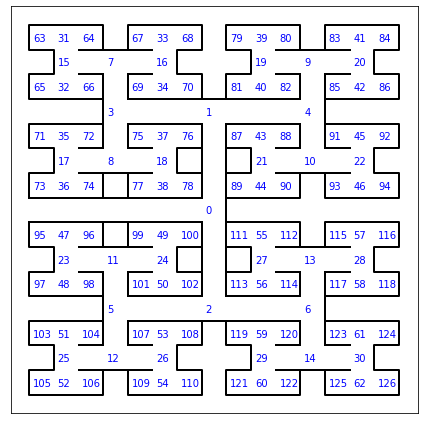

In [4]:
# Draw maze with node numbers
ma=NewMaze(6)
PlotMazeNodes(ma,figsize=6)

In [5]:
# define node numbers of all nodes
lv6_nodes = list(range(63,127))
lv5_nodes = list(range(31,63))
lv4_nodes = list(range(15,31))
lv3_nodes = list(range(7,15))
lv2_nodes = list(range(3,7))
lv1_nodes = list(range(1,3))
lv0_nodes = list(range(0,1))
lvl_dict = {0:lv0_nodes, 1:lv1_nodes, 2:lv2_nodes, 3:lv3_nodes, 4:lv4_nodes, 5:lv5_nodes, 6:lv6_nodes}

In [6]:
# inverse-define node numbers of all nodes mapped to depth
inv_lvl_dict = {n: level for level, nodes in lvl_dict.items() for n in nodes}
inv_lvl_dict[127] = -1   # home

In [7]:
# nodes in different quadrants
quads = [3,4,5,6]
sub_quads = {}
for q in quads:
    sub_quads[q] = []

    sub_quads[q].append(q)
    counter = 0
    while counter < len(sub_quads[q]):
        i = sub_quads[q][counter]
        m, n = 2*i+1, 2*i+2
        if m <= 126:
            sub_quads[q].append(m)
        if n <= 126:
            sub_quads[q].append(n)
        counter += 1

In [9]:
print(sub_quads[3])

[3, 7, 8, 15, 16, 17, 18, 31, 32, 33, 34, 35, 36, 37, 38, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]


#### Count number of direct paths from reward port to home and home to reward port.
##### Since the location of home is not clear, use the center point (node 0) as a proxy for home.

In [99]:
reward_to_home_direct_path = [116, 57, 28, 13, 6, 2, 0]
home_to_reward_direct_path = reward_to_home_direct_path[::-1]

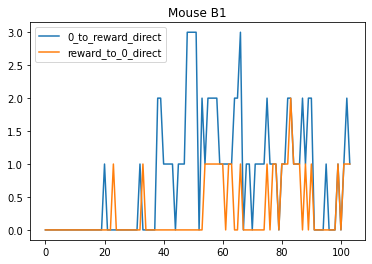

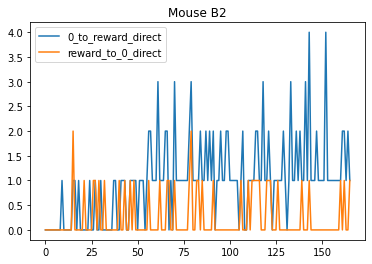

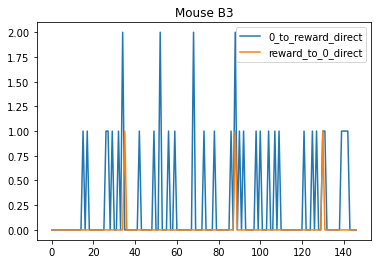

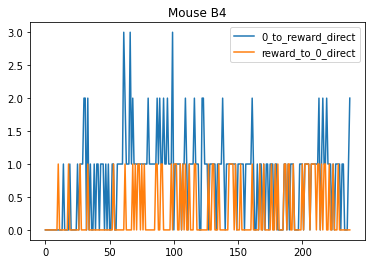

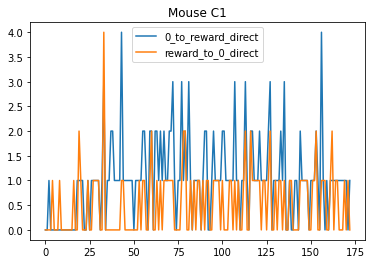

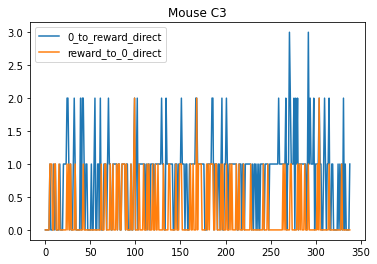

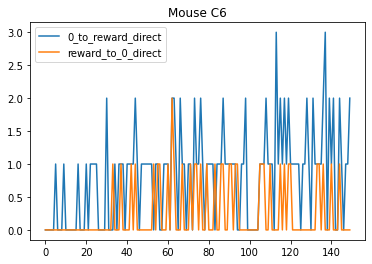

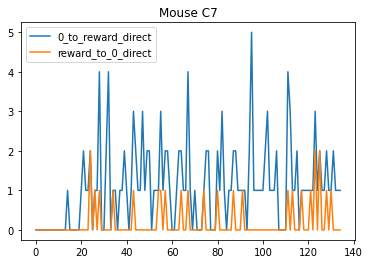

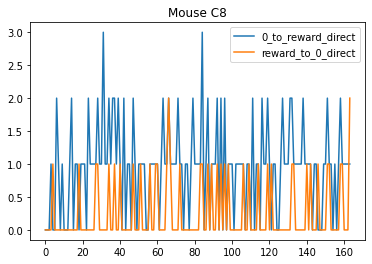

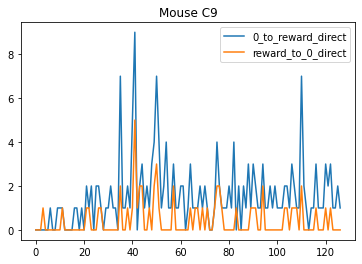

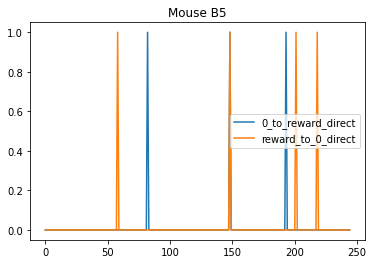

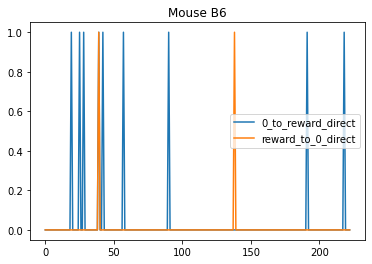

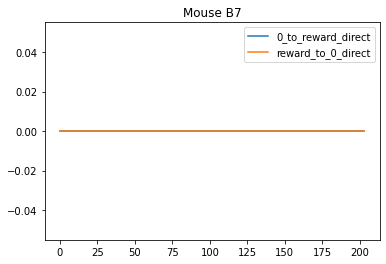

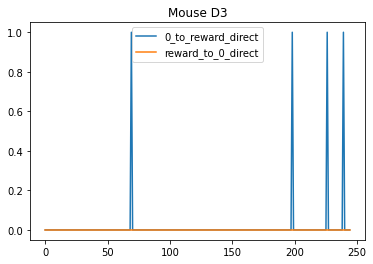

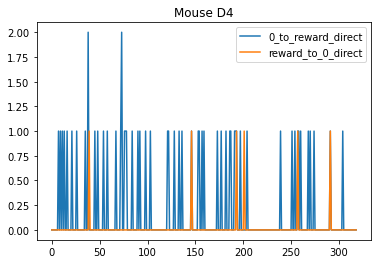

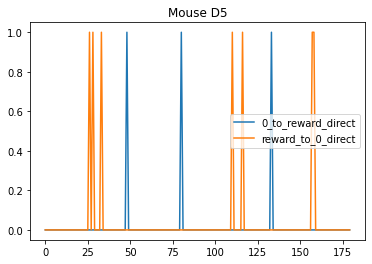

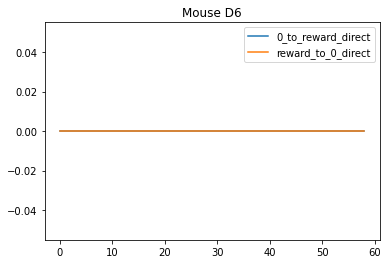

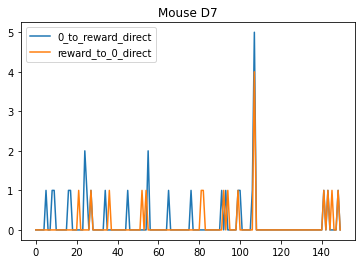

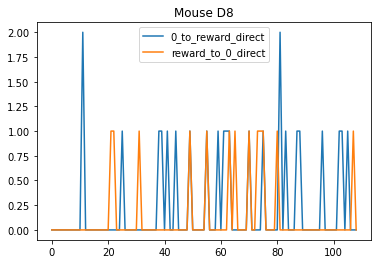

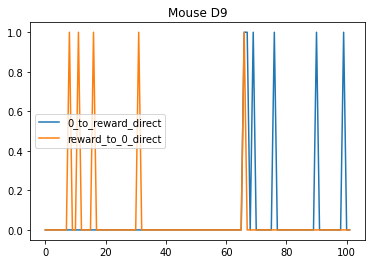

In [113]:
direct_path_all_mouse = []
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')

    reward_to_home_direct_path_count_array = []
    home_to_rwd_direct_path_count_array = []

    for i, bout in enumerate(tf.no):
        rwd_to_home_direct_path_count, home_to_rwd_direct_path_count = 0, 0

        for j in range(len(bout)):
            path = [node for node, frame in bout[j:j+7]]
            if path == home_to_reward_direct_path:
#                 print(f"Bout {i} home_to_reward_direct_path {j}: {path}")
                home_to_rwd_direct_path_count += 1
            elif path == reward_to_home_direct_path:
#                 print(f"Bout {i} reward_to_home_direct_path {j}: {path}")
                rwd_to_home_direct_path_count += 1
        home_to_rwd_direct_path_count_array.append(home_to_rwd_direct_path_count)
        reward_to_home_direct_path_count_array.append(rwd_to_home_direct_path_count)

#     print(reward_to_home_direct_path_count_array)
#     print(home_to_rwd_direct_path_count_array)

    direct_path_all_mouse.append(
        [sum(home_to_rwd_direct_path_count_array), sum(reward_to_home_direct_path_count_array)]
    )

    plt.plot(home_to_rwd_direct_path_count_array, label='0_to_reward_direct')
    plt.plot(reward_to_home_direct_path_count_array, label='reward_to_0_direct')
    plt.title(f"Mouse {nickname}")
    plt.legend()
    plt.show()

In [107]:
direct_path_all_mouse

[[81, 29],
 [163, 39],
 [37, 3],
 [191, 64],
 [177, 92],
 [268, 83],
 [122, 37],
 [146, 25],
 [155, 41],
 [196, 56],
 [3, 4],
 [9, 2],
 [0, 0],
 [4, 0],
 [57, 6],
 [3, 7],
 [0, 0],
 [28, 18],
 [24, 13],
 [6, 5]]

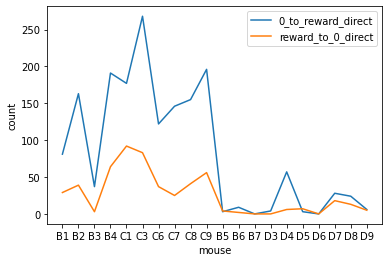

In [117]:
direct_path_all_mouse = np.array(direct_path_all_mouse)
plt.plot(direct_path_all_mouse[:, 0], label='0_to_reward_direct')
plt.plot(direct_path_all_mouse[:, 1], label='reward_to_0_direct')
plt.xticks(ticks=np.arange(0,20), labels=AllNames)
plt.ylabel('count')
plt.xlabel('mouse')
plt.legend()
plt.show()

##### Seems like there's indeed a difference in rewarded animals vs unrewarded.

#### Line of sight analysis

Out of 2 end nodes facing each other, the number of times one is visited **before** the other and analyze if the one being visited **first** while coming from a level 4 node is the one in line-of-sight.

In [40]:
left_nodes = dict.fromkeys(lv6_nodes[::2], 1)
right_nodes = dict.fromkeys(lv6_nodes[1::2], 1)

In [147]:
line_of_sight_left = np.array([63, 65, 71, 73, 95, 97, 103, 105, 79, 81, 87, 89, 111, 113, 119, 121])
line_of_sight_left_opp = line_of_sight_left + 1
line_of_sight_right = np.array([68, 70, 76, 78, 100, 102, 108, 110, 84, 86, 92, 94, 116, 118, 124, 126])
line_of_sight_right_opp = line_of_sight_right - 1

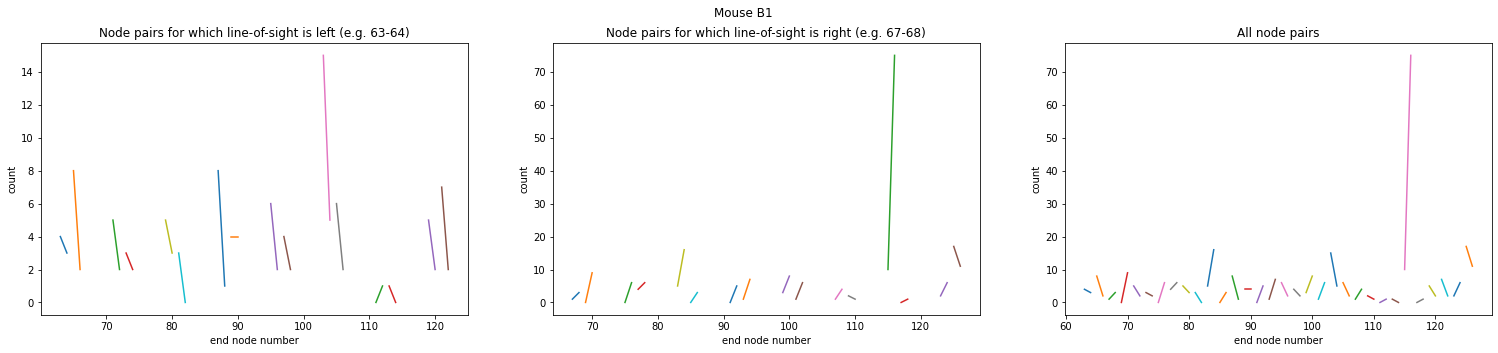

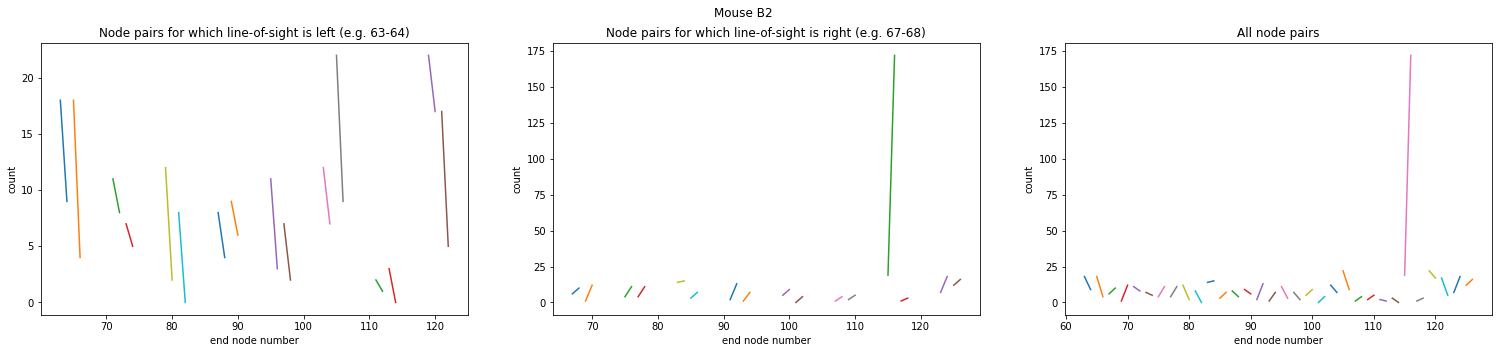

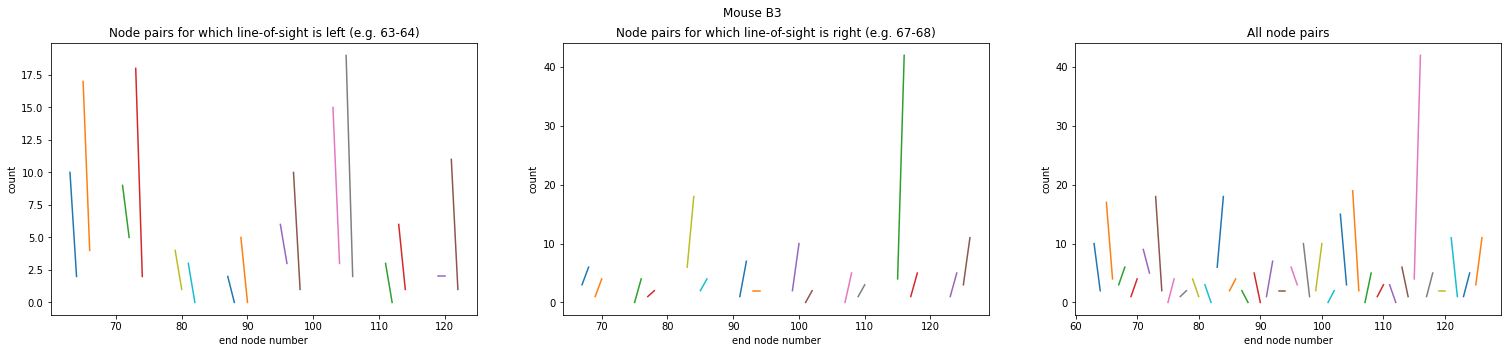

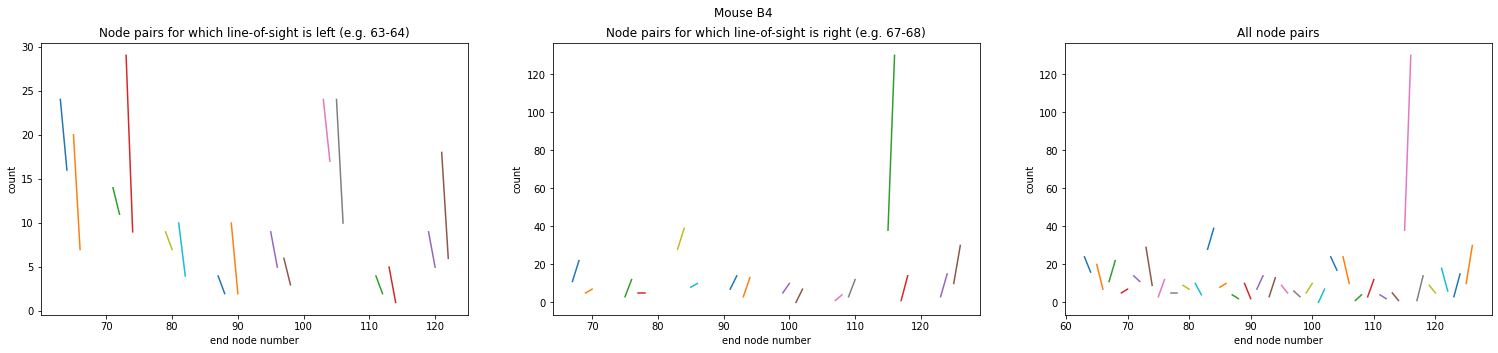

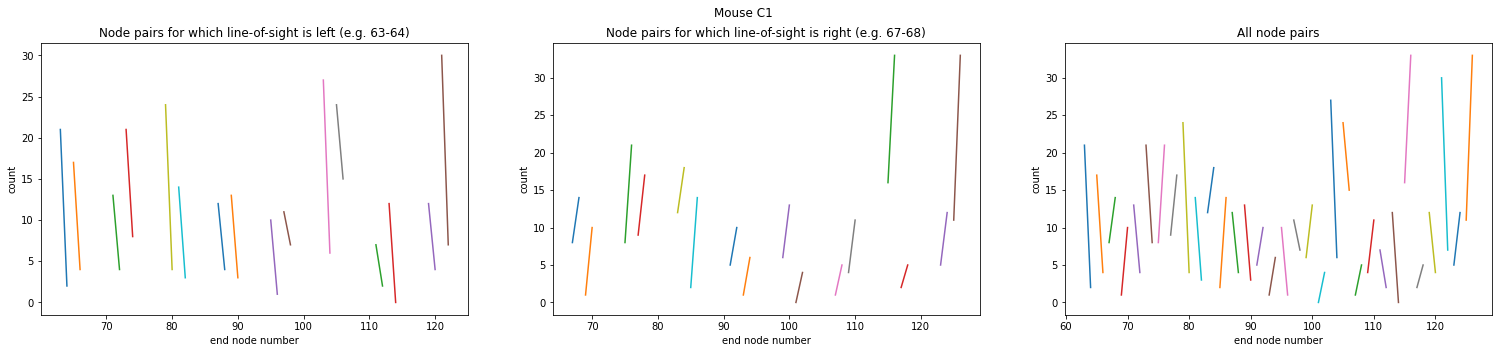

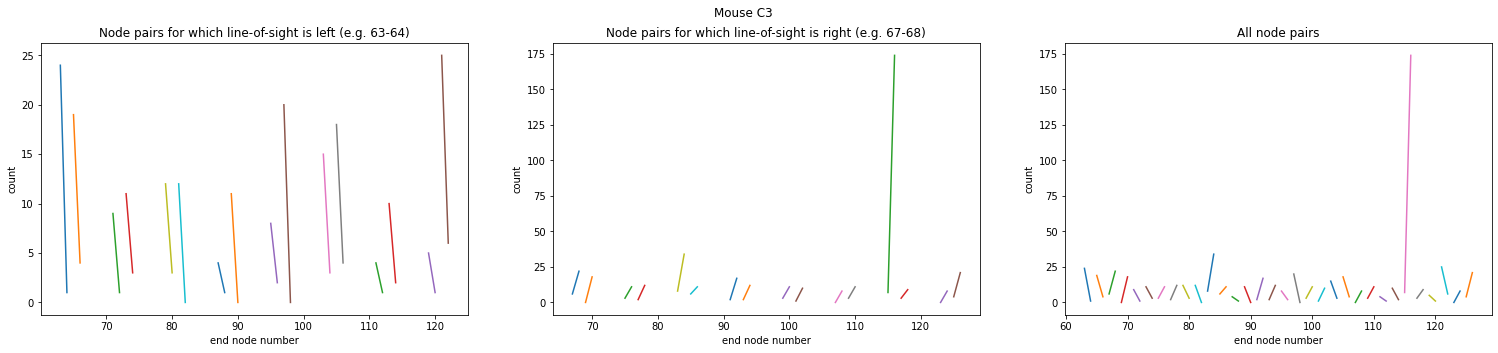

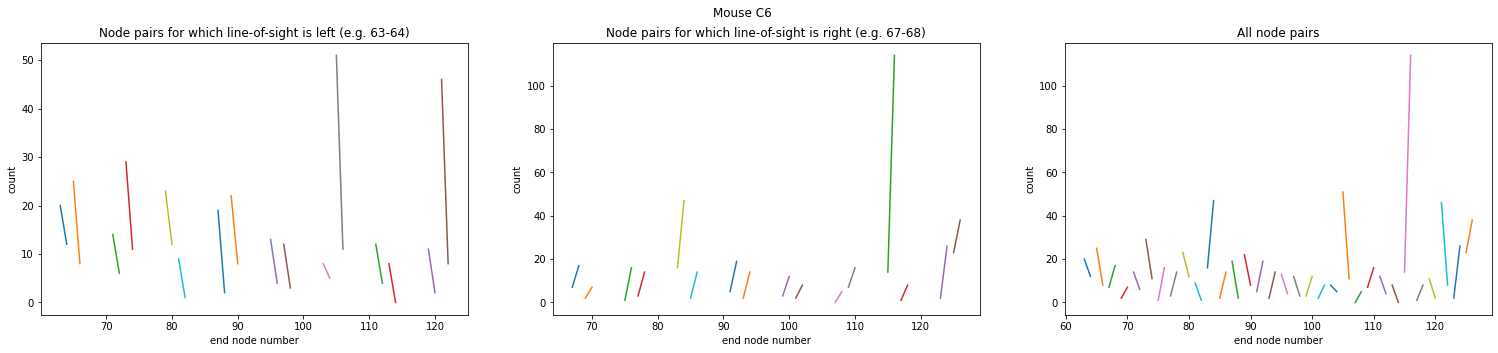

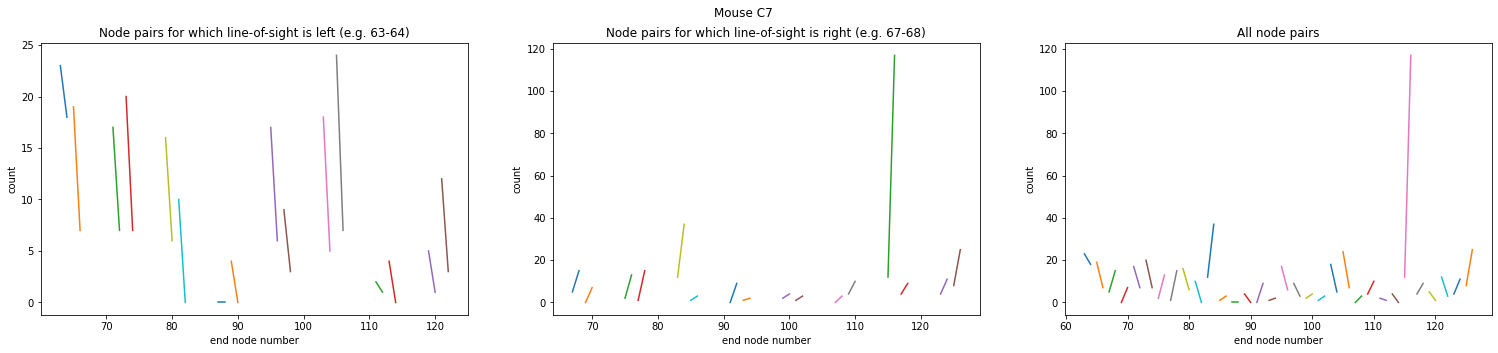

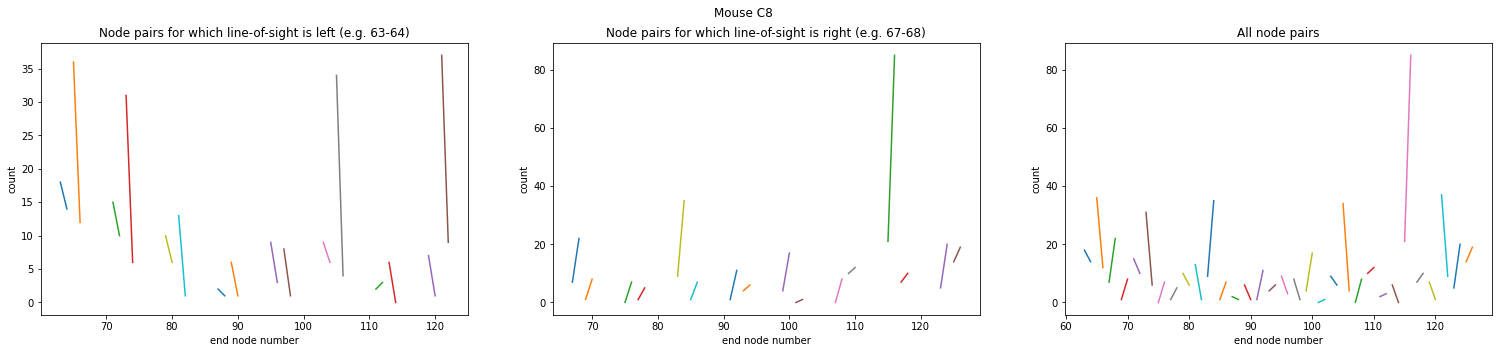

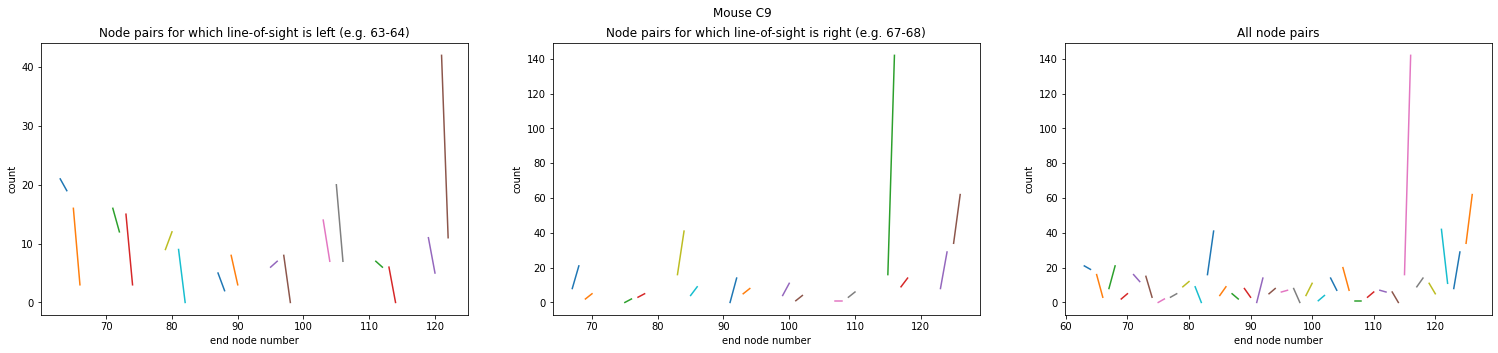

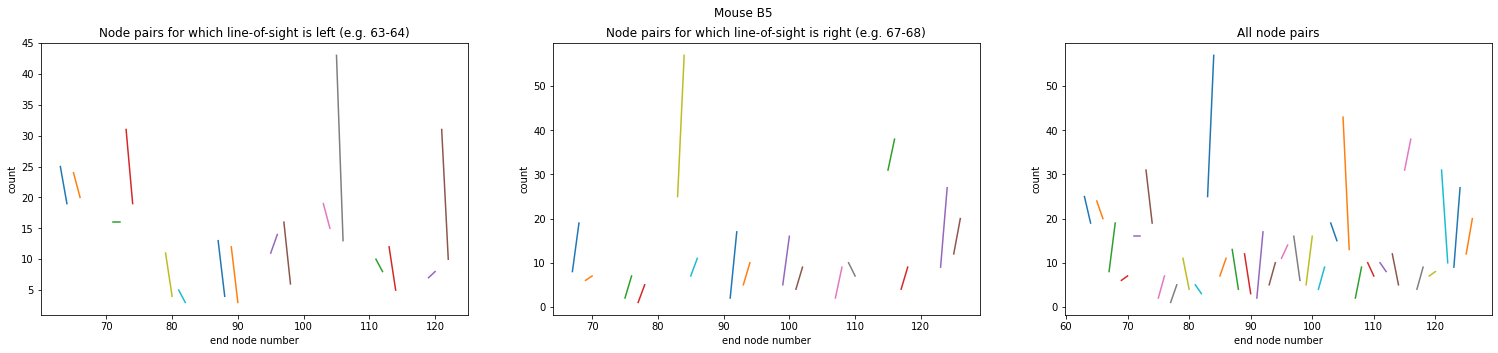

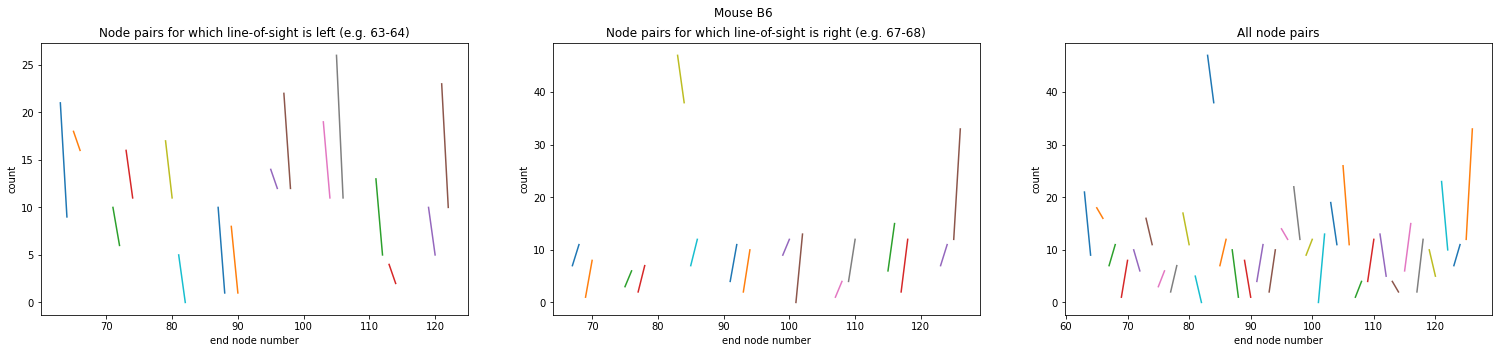

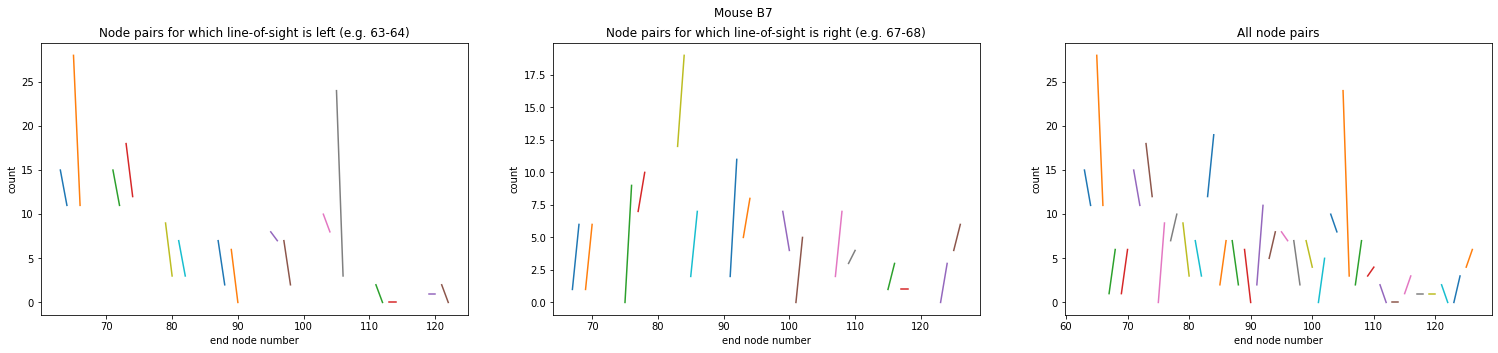

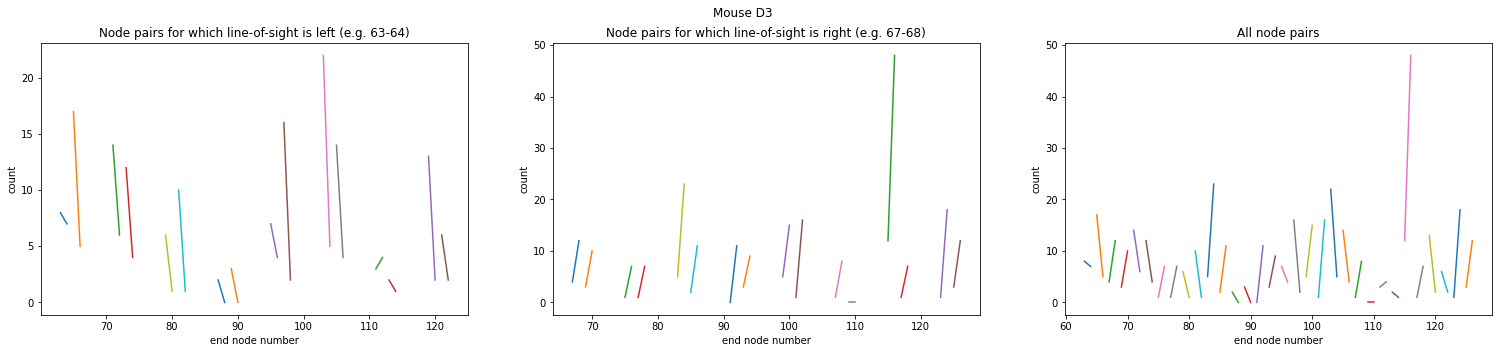

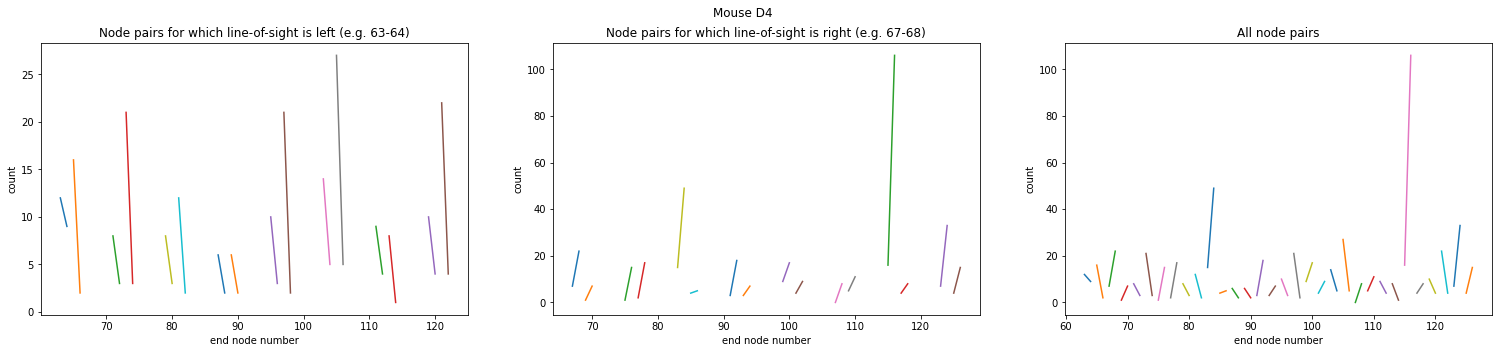

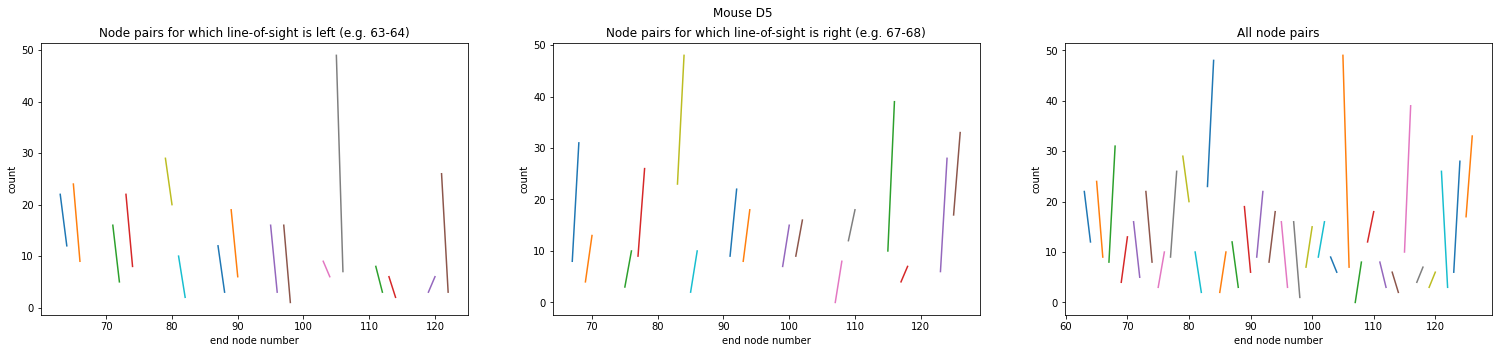

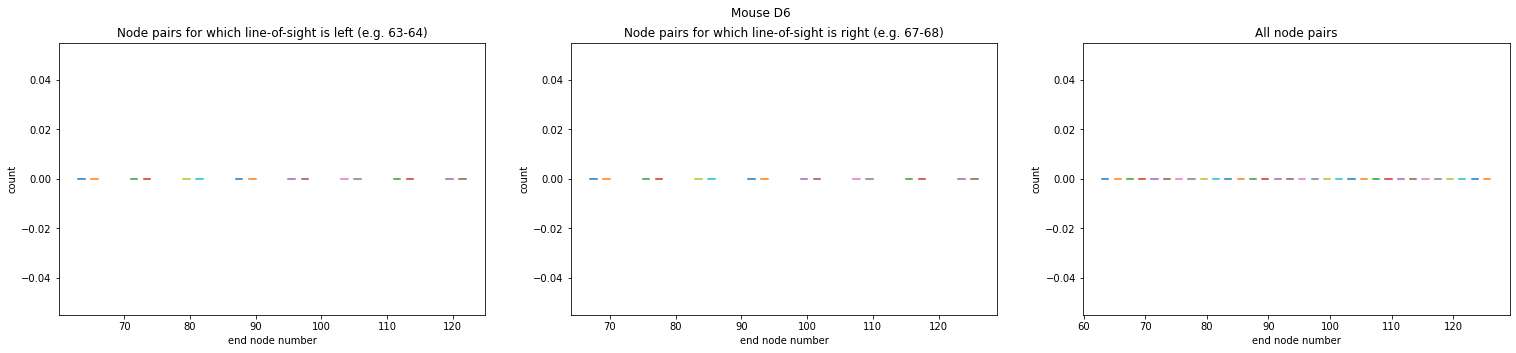

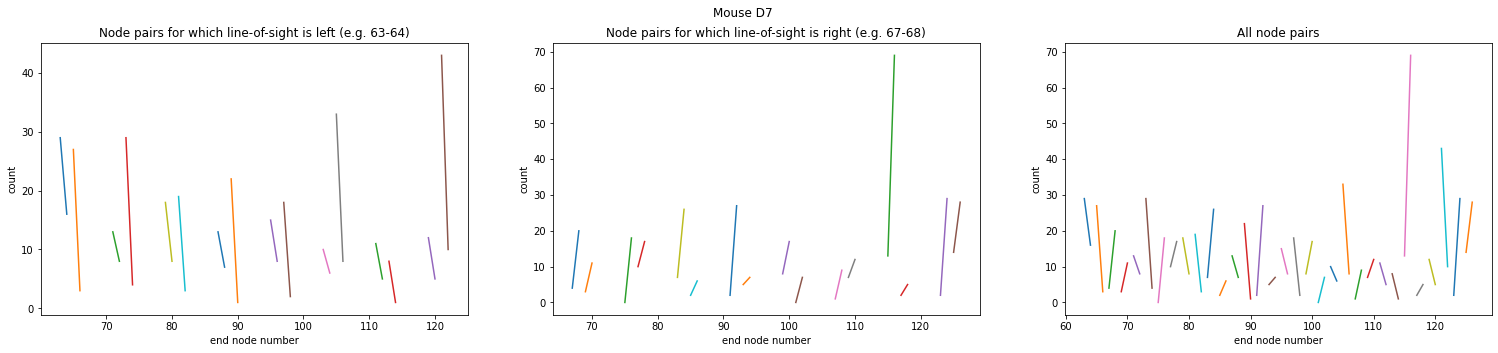

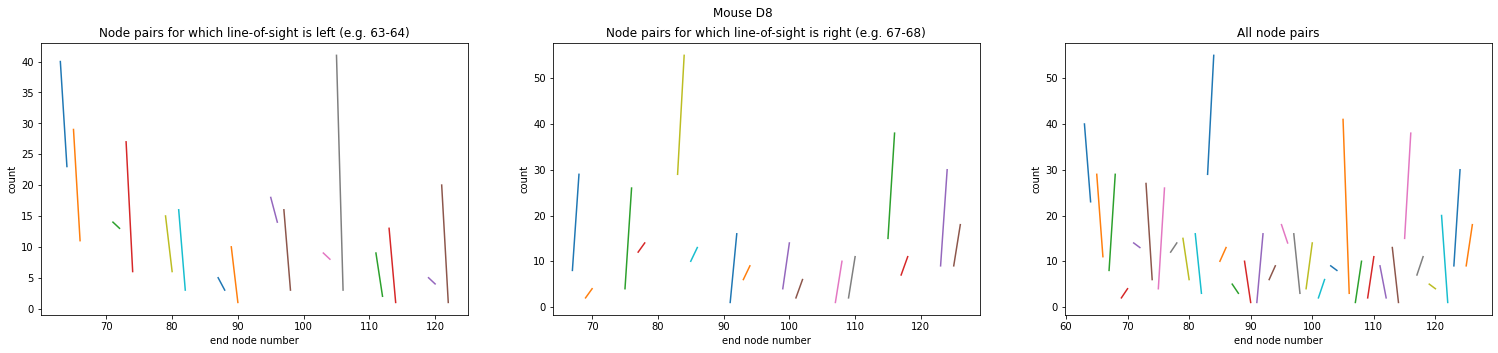

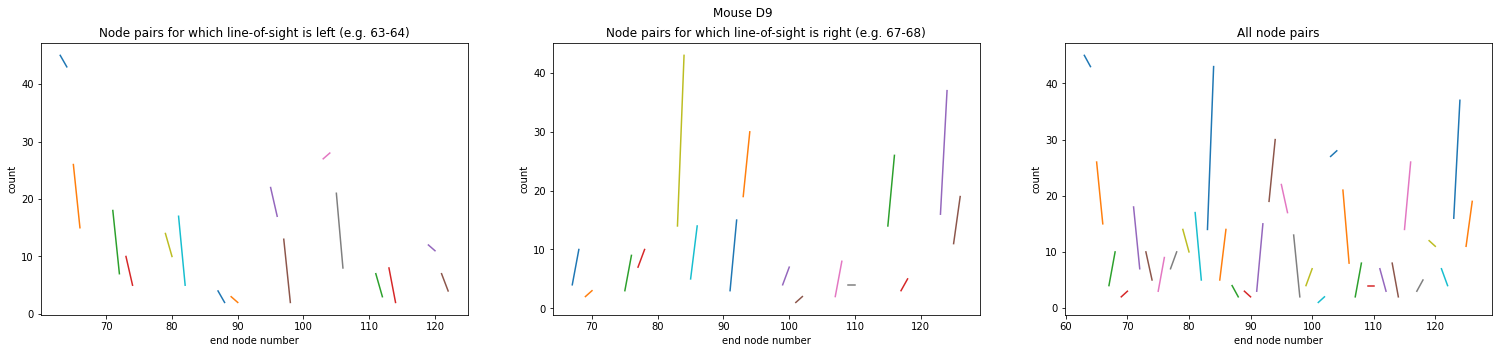

In [151]:
for nickname in AllNames:
    first_visit_endnode_counts = dict.fromkeys(lv6_nodes, 0)
    tf = LoadTraj(nickname+'-tf')

    for i, bout in enumerate(tf.no):
        path = [node for node, _ in bout]
#         print(path)
        for j in range(len(path)):
            query_path = path[j:j+3]
            if len(query_path) < 3:
                break
            
            if abs(query_path[0] - query_path[2]) == 1:
                if (query_path[0] in left_nodes and query_path[2] in right_nodes) or (query_path[0] in right_nodes and query_path[2] in left_nodes):
                    first_visit_endnode_counts[query_path[0]] += 1

    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(26, 5))
    for l, r in zip(line_of_sight_left, line_of_sight_left_opp):
        axes[0].plot([l, r], [first_visit_endnode_counts[l], first_visit_endnode_counts[r]])
        axes[0].set_title("Node pairs for which line-of-sight is left (e.g. 63-64)")
        axes[0].set_ylabel('count')
        axes[0].set_xlabel('end node number')
    for l, r in zip(line_of_sight_right, line_of_sight_right_opp):
        axes[1].plot([l, r], [first_visit_endnode_counts[l], first_visit_endnode_counts[r]])
        axes[1].set_title("Node pairs for which line-of-sight is right (e.g. 67-68)")
        axes[1].set_ylabel('count')
        axes[1].set_xlabel('end node number')
    for l, r in zip(left_nodes, right_nodes):
        axes[2].plot([l, r], [first_visit_endnode_counts[l], first_visit_endnode_counts[r]])
        axes[2].set_title("All node pairs")
        axes[2].set_ylabel('count')
        axes[2].set_xlabel('end node number')
    plt.suptitle(f"Mouse {nickname}")
    plt.show()

##### Each colored line represents one pair (example, in the section around 119-59-120, the end nodes being compared are 119 and 120). 
The graph on the left denotes the line-of-sight while entering from a level 4 node towards left. For 119-59-120, the mouse enters from 14 and the node in line-of-sight is 119. It shows it went to 119 more often than 120, so it _preferred_ the node direct on the line-of-sight.

For left graph, it's slanted to the left because the left nodes are the lowered number than the ones on the right across the maze. (e.g. 119 is left and it's lower numbered than 120). Similarily for right, they are slanted to the right because they are higher-numbered.

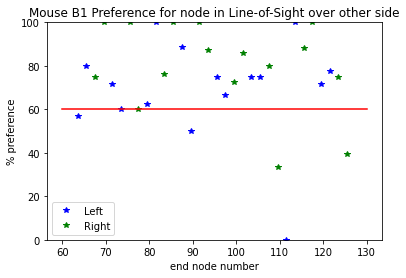

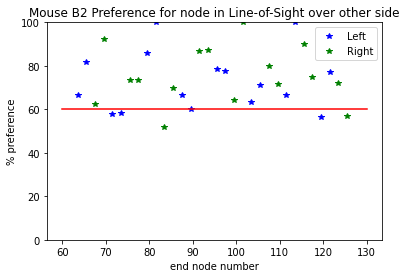

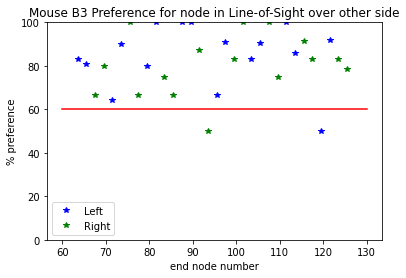

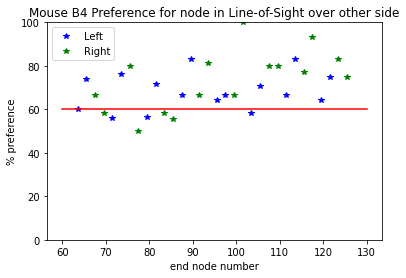

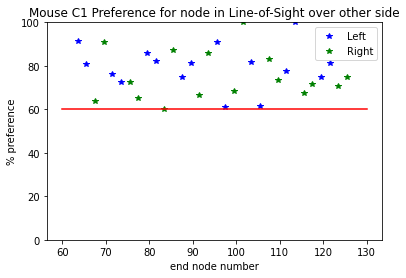

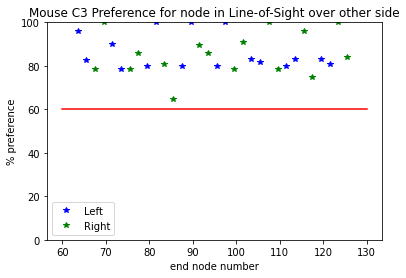

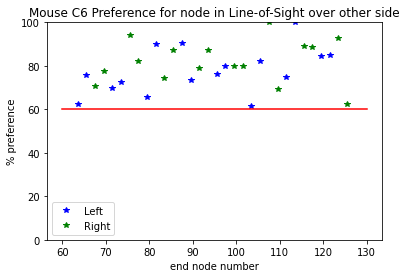

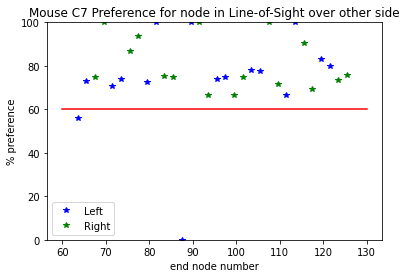

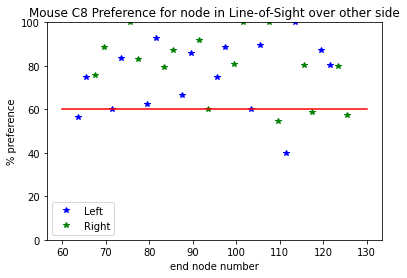

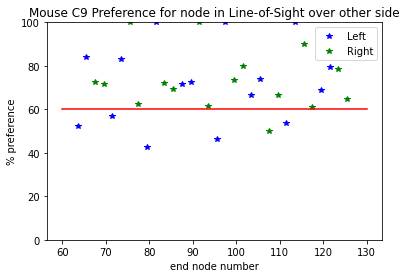

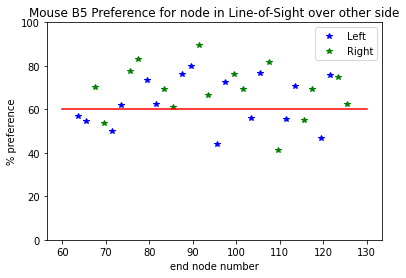

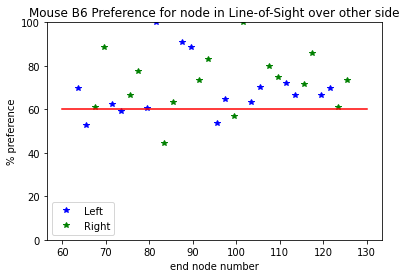

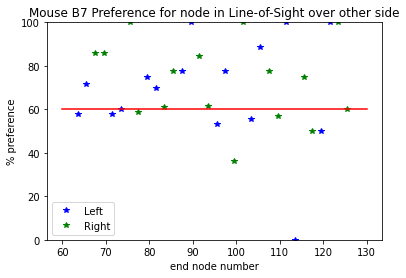

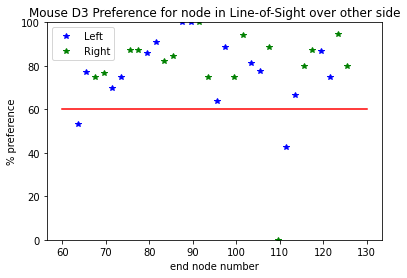

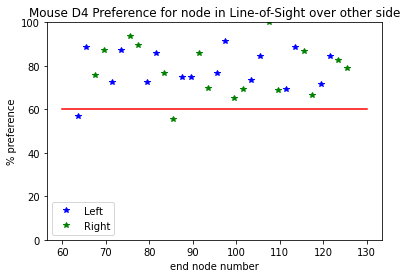

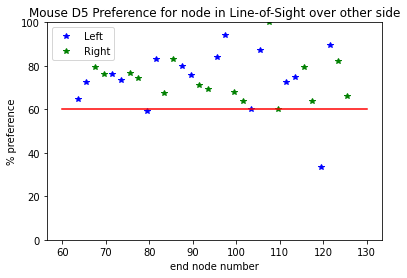

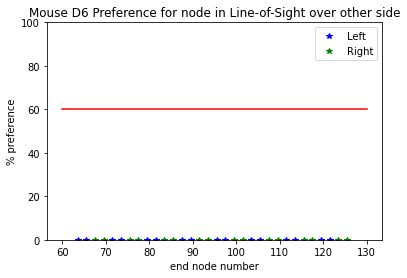

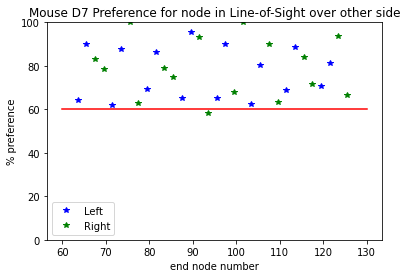

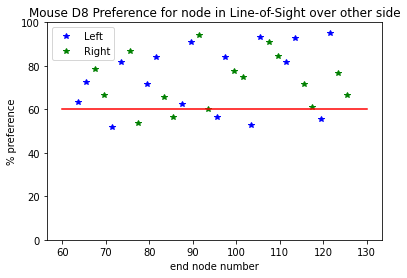

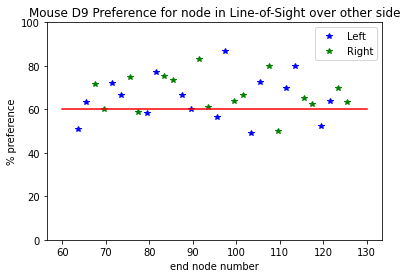

In [50]:
los_preference_avg = defaultdict(int)
for nickname in AllNames:
    first_visit_endnode_counts = first_visit_endnode_counts_mouse[nickname]

    fig, axes = plt.subplots()
    lpoints = [[], []]
    for l, r in zip(line_of_sight_left, line_of_sight_left_opp):
#         print(l, r)
        l_, r_ = first_visit_endnode_counts[l], first_visit_endnode_counts[r]
        if l_+r_:
            x, y = (l+r)/2, (l_*100)/(l_+r_)
        else:
            x, y = (l+r)/2, 0
        lpoints[0].append(x)
        lpoints[1].append(y)
    axes.plot(lpoints[0], lpoints[1], 'b*')
    axes.set_title(f"Mouse {nickname} Preference for node in Line-of-Sight over other side")
    axes.set_ylabel('% preference')
    axes.set_xlabel('end node number')
    axes.set_ylim([0,100])
    
    rpoints = [[], []]
    for r, l in zip(line_of_sight_right, line_of_sight_right_opp):
#         print(r, l)
        r_, l_ = first_visit_endnode_counts[r], first_visit_endnode_counts[l]
        if r_+l_:
            x, y = (l+r)/2, (r_*100)/(r_+l_)
        else:
            x, y = (l+r)/2, 0
        rpoints[0].append(x)
        rpoints[1].append(y)
    axes.plot(rpoints[0], rpoints[1], 'b*')
    axes.plot([60, 130], [60, 60], 'r-')
    
    los_preference_avg[nickname] = np.mean(lpoints[1] + rpoints[1])

#     plt.suptitle(f"Mouse {nickname}")
    plt.show()

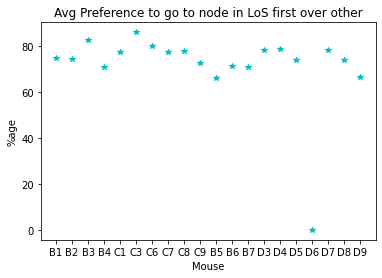

In [63]:
plt.plot(range(0, 20),los_preference_avg.values(), 'c*')
plt.xticks(ticks=np.arange(0,20), labels=AllNames)
plt.xlabel('Mouse')
plt.ylabel('%age')
plt.title('Avg Preference to go to node in LoS first over other')
plt.show()

#### Visiting other nodes equivalent to reward port

In [153]:
control_nodes = [105, 100, 116]
def count_visit_to_nodes(control_nodes):
    futile_visits = []
    for nickname in RewNames:
        tf = LoadTraj(nickname+'-tf')
        plot_array = []
        for i, bout in enumerate(tf.no):
            path = np.array([node for node, _ in bout])
            reward_count = len(tf.re[i])
            counts = []
            for control_node in control_nodes:
                count = np.count_nonzero(path == control_node)
                if control_node == 116:
                    count -= reward_count
                counts.append(count)
            if counts:
                plot_array.append(counts)
        sums = np.sum(np.array(plot_array), axis=0)
        futile_visits.append(sums)

    futile_visits = np.array(futile_visits)
    plt.plot(futile_visits)
    plt.legend(control_nodes[:-1] + ['Reward'])
    plt.xticks(ticks=np.arange(0,10), labels=RewNames)
    plt.show()
    return

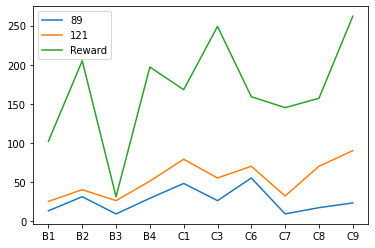

In [157]:
# 89 and 121
count_visit_to_nodes([89, 121, 116])

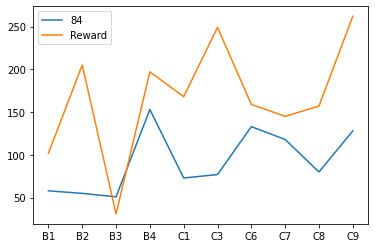

In [160]:
count_visit_to_nodes([84, 116])

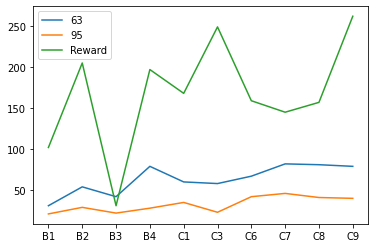

In [161]:
count_visit_to_nodes([63, 95, 116])

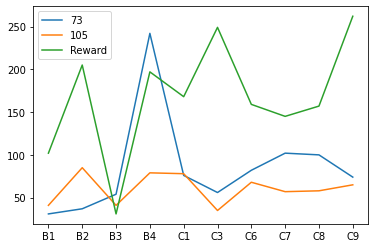

In [162]:
count_visit_to_nodes([73, 105, 116])

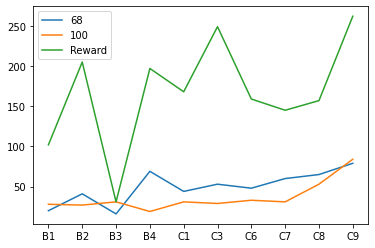

In [165]:
count_visit_to_nodes([68, 100, 116])

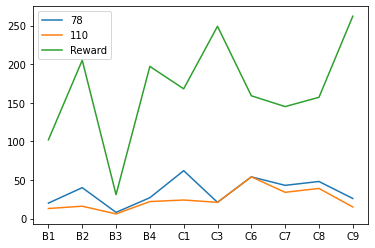

In [166]:
count_visit_to_nodes([78, 110, 116])

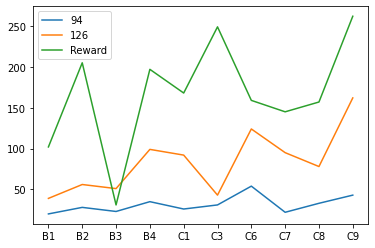

In [159]:
count_visit_to_nodes([94, 126, 116])